# StatQuest: R-squared explained

Video Link: https://www.youtube.com/watch?v=2AQKmw14mHM

## Note: 
* For this notebook, we shall be using the Pima Indian Diabetes dataset and try and find meaningful correlations and insights from this widely used data. 
* We shall be writing all code in pure python and build functions from scratch
* We shall be using libraries as well but only to confirm and test if our python functions work perfectly or not. 
* Finally we shall bring together all small functions into a single large generalized functions so we can reuse and test out with multiple different dataset features.

## Exploring the dataset

In [18]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
csv_path = '../dataset/diabetes.csv'

In [15]:
df = pd.read_csv(csv_path)

In [16]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Prototyping features
* As shown in the video, the mouse size and weight features are taken into consideration


### Here we take the BloodPressure and BMI into account 
This isn't a random choice, we use these based on the conclusion drawn in mega survey published in JAMA
https://jamanetwork.com/journals/jamanetworkopen/fullarticle/2696872#:~:text=Body%20mass%20index%20(BMI)%20is%20positively%20associated%20with%20both%20systolic,diastolic%20blood%20pressure%20(DBP).&text=Weight%20loss%20significantly%20reduces%20blood,BP%20but%20is%20causally%20associated.

### Lets plot the data first
* X axis - BMI
* Y axis - Blood pressure

In [25]:
bmi = list(df.BMI)
blood_pressure = list(df.BloodPressure)

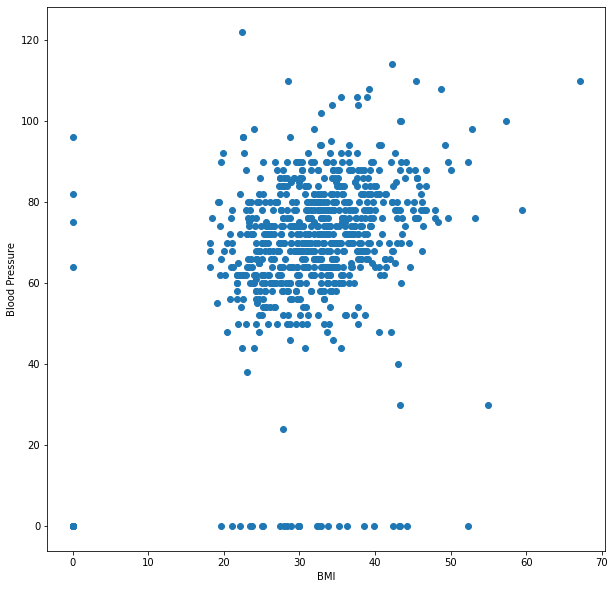

In [26]:
plt.figure(figsize=(10, 10))
plt.scatter(x=bmi, y=blood_pressure)
plt.xlabel('BMI')
plt.ylabel('Blood Pressure')
plt.show()

## Get the mean of Blood Pressure and plot it as a line on the graph

In [27]:
mean_blood_pressure = sum(blood_pressure)/len(blood_pressure)
mean_blood_pressure

69.10546875

In [29]:
# basic verification
np.mean(df.BloodPressure), df.BloodPressure.mean()

(69.10546875, 69.10546875)

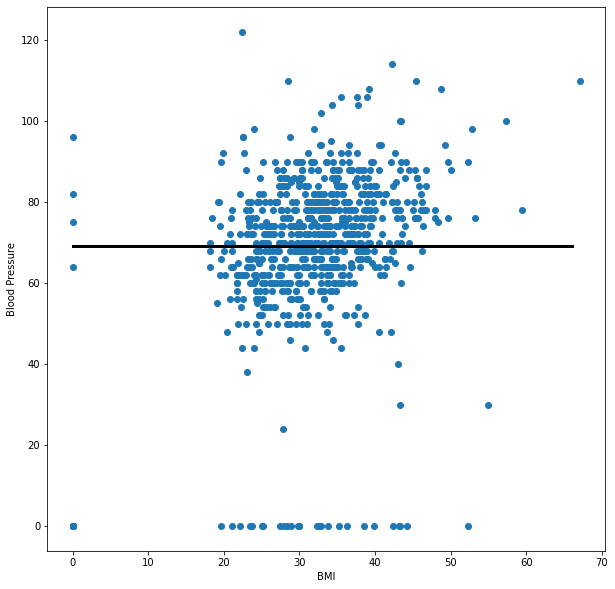

In [40]:
plt.figure(figsize=(10, 10))
plt.scatter(x=bmi, y=blood_pressure)
plt.xlabel('BMI')
plt.ylabel('Blood Pressure')
plt.plot([mean_blood_pressure for x in range(int(max(bmi)))], color='black', linewidth = '3')
plt.show()

## The equation for the above drawn line is:
#### y = mean_blood_pressure + 0*x
For all points of x,
turning it into this function

In [44]:
def equation_of_line(slope, x, y_intercept):
    return y_intercept  + slope * x

## Calculate the variation of the data
Formula: sum(blood pressure_i - mean)^2

* We are calculating the residual - distance of point from the mean by doing blood (pressure of point i - mean)
* We then square each value so that while taking the sum of these residuals, they dont cancel out each other

In [47]:
points_on_mean_line = [equation_of_line(slope=0, x=x, y_intercept=mean_blood_pressure) for x in bmi]

In [48]:
# could be done in a list comprehension too but trying to be verbose here
residuals = []
for i in range(len(blood_pressure)):
    blood_pressure_value = blood_pressure[i]
    point_on_line = points_on_mean_line[i]
    residuals.append(blood_pressure_value - point_on_line)

In [49]:
# square all residual values
squared_array_of_residuals = [res**2 for res in residuals]

In [50]:
# get the sum of squares of all squared residuals
sum_of_squared_residuals = sum(squared_array_of_residuals)

In [51]:
sum_of_squared_residuals

287354.45703125

In [69]:
variation_along_mean_line = sum_of_squared_residuals

In [62]:
# verification using numpy
sum_of_squared_residuals_numpy = np.sum(((np.array(df.BloodPressure) - mean_blood_pressure)**2))
sum_of_squared_residuals_numpy

287354.45703125

# Now we find a line which best fits the data
We shall do this using the least squares formula

In [63]:
x_squared = [bmi_value**2 for bmi_value in bmi]
xy = [bmi[i]*blood_pressure[i] for i in range(len(blood_pressure))]
N = len(blood_pressure)

In [66]:
# slope
numerator = (N*sum(xy)) - (sum(bmi)*sum(blood_pressure))
denominator = (N*sum(x_squared)) - (sum(bmi)**2)

m = numerator/denominator
m

0.6918389034466967

In [67]:
# calculate y intercept
c = (sum(blood_pressure) - m*sum(bmi))/N
c

46.97175858156724

In [79]:
slope, intercept = np.polyfit(bmi, blood_pressure, 1)
slope, intercept

(0.6918389034467239, 46.971758581566334)

## Finding points fitting on the best fit line

In [68]:
points_on_best_fit_line = [equation_of_line(slope=m, x=x, y_intercept=c) for x in bmi]

# Plot best fit line

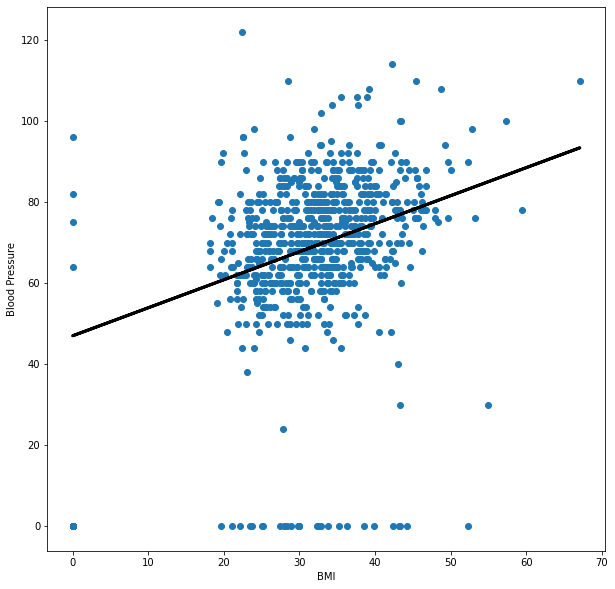

In [81]:
plt.figure(figsize=(10, 10))
plt.scatter(x=bmi, y=blood_pressure)
plt.xlabel('BMI')
plt.ylabel('Blood Pressure')
plt.plot(bmi, points_on_best_fit_line, color='black', linewidth = '3')
plt.show()

## Calculate the variation (sum of squared residuals) in the same way as done for mean line

In [82]:
# could be done in a list comprehension too but trying to be verbose here
residuals = []
for i in range(len(blood_pressure)):
    blood_pressure_value = blood_pressure[i]
    point_on_line = points_on_best_fit_line[i]
    residuals.append(blood_pressure_value - point_on_line)

In [83]:
# square all residual values
squared_array_of_residuals = [res**2 for res in residuals]

In [84]:
# get the sum of squares of all squared residuals
sum_of_squared_residuals = sum(squared_array_of_residuals)

In [85]:
sum_of_squared_residuals

264534.4267258719

In [86]:
variation_along_best_fit_line = sum_of_squared_residuals

In [87]:
# verification using numpy
sum_of_squared_residuals_numpy = np.sum(((np.array(df.BloodPressure) - np.array(points_on_best_fit_line))**2))
sum_of_squared_residuals_numpy

264534.4267258725

## Calculating r squared

Formula = (variation along mean line - variation along best fit line)/ variation along mean line

In [88]:
r_squared = (variation_along_mean_line - variation_along_best_fit_line)/variation_along_mean_line

In [89]:
r_squared

0.07941422082378345

In [91]:
# verification of r squared using numpy
corr_matrix = np.corrcoef(bmi, blood_pressure)
corr = corr_matrix[0,1]
R_sq = corr**2
 
print(R_sq)

0.07941422082378156


In [92]:
corr

0.28180528884991063

In [95]:
## Lastly checking with scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


X = np.array(bmi)
Y = np.array(blood_pressure)
# Cannot use Rank 1 matrix in scikit learn
X = X.reshape((len(bmi), 1))
# Creating Model
reg = LinearRegression()
# Fitting training data
reg = reg.fit(X, Y)
# Y Prediction
Y_pred = reg.predict(X)
 
# Calculating R2 Score
r2_score = reg.score(X, Y)
 
print(r2_score)

# hurray, our python code's output is extremely close to the one calculated from sklearn's

0.07941422082378158


# Insights
* There is definitely a positive correlation between the bmi or a person and their blood pressure
* Our goal was to quantify how better or worse did our best_fit_line fit the data than the mean line
* In this case, apparently the goodness of fit (quantification of fit) wasn't quite high for this dataset
* This still has the value that BMI and Blood pressure are correlated positively
* Although if only the BMI is given, as a sole independent variable, it isn't enough and the best way to predict a person's Blood pressure, atleast in the realms of this dataset

## Generalized function

In [103]:
def variation_around_line(data_points, line_points):
    sum_of_squared_residuals = float(np.sum(((np.array(data_points) - np.array(line_points))**2)))
    return sum_of_squared_residuals

In [137]:
# making a generalized function 
# takes in the feature/column names as input 
def get_r_squared(df, x_feature_name, y_feature_name, plot=True):
    
    x = list(df[x_feature_name])
    y = list(df[y_feature_name])
    
    # find mean of y feature
    y_mean = np.mean(y)
    # find points of y mean line
    points_on_mean_line = [equation_of_line(slope=0, x=i, y_intercept=y_mean) for i in x]
    
    # find data variation along the mean line
    variation_along_mean_line = variation_around_line(y, points_on_mean_line)
    
    # find the best fit line
    slope, intercept = np.polyfit(x, y, 1)
    points_on_best_fit_line = [equation_of_line(slope=slope, x=i, y_intercept=intercept) for i in x]
    
    # find variation around the best fit line
    variation_along_best_fit_line = variation_around_line(y, points_on_best_fit_line)
    
    r_squared = (variation_along_mean_line - variation_along_best_fit_line)/variation_along_mean_line
    
    # sklearns function
    X = np.array(x)
    Y = np.array(y)
    # Cannot use Rank 1 matrix in scikit learn
    X = X.reshape((len(x), 1))
    # Creating Model
    reg = LinearRegression()
    # Fitting training data
    reg = reg.fit(X, Y)
    # Y Prediction
    Y_pred = reg.predict(X)

    # Calculating R2 Score
    r2_score = reg.score(X, Y)
    
    if plot == True:
        plt.figure(figsize=(10, 10))
        plt.scatter(x=x, y=y)
        plt.xlabel(x_feature_name)
        plt.ylabel(y_feature_name)
        plt.plot(x, points_on_mean_line, color='black', linewidth='3')
        plt.plot(x, points_on_best_fit_line, color='red', linewidth = '3')
        plt.title('r squared: {}'.format(r_squared))
        plt.show()
    else:
        return r_squared, r2_score

In [138]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


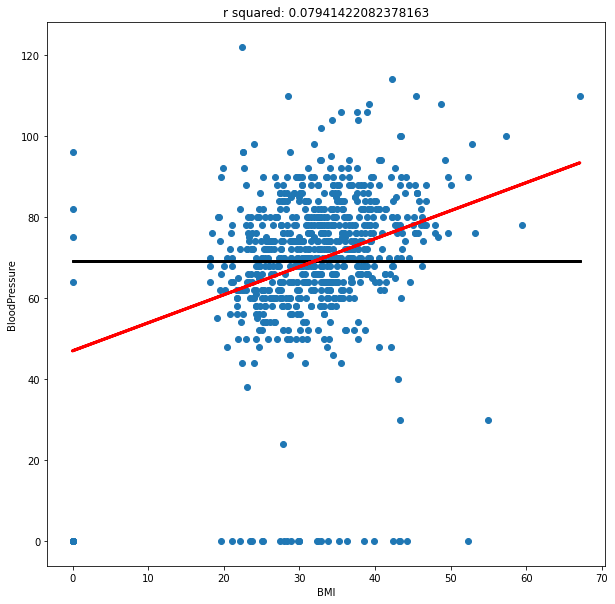

In [139]:
# Do a check for our originally tested features to validate numbers
get_r_squared(df=df, x_feature_name='BMI', y_feature_name='BloodPressure') # it works

## Computing for one to many features for all features

In [140]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [141]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [142]:
r_squared_dictionary = {}
r_squared_sklearn = {}
list_of_columns_to_be_analysed = ['Pregnancies', 'Glucose', 
                                  'BloodPressure', 'SkinThickness', 
                                  'Insulin', 'BMI', 
                                  'DiabetesPedigreeFunction', 'Age']

for column1 in list_of_columns_to_be_analysed:
    for column2 in list_of_columns_to_be_analysed:
        if column1 == column2:
            continue
        else:
            our_r2_score, sklearn_r_score = get_r_squared(df=df, 
                                                          x_feature_name=column1,
                                                          y_feature_name=column2,
                                                          plot=False)
            
            r_squared_dictionary[f'{column1}_V_{column2}'] = our_r2_score
            r_squared_sklearn[f'{column1}_V_{column2}'] = sklearn_r_score

In [143]:
r_squared_dictionary

{'Pregnancies_V_Glucose': 0.01675954762635651,
 'Pregnancies_V_BloodPressure': 0.019960597140071604,
 'Pregnancies_V_SkinThickness': 0.006670278741649795,
 'Pregnancies_V_Insulin': 0.005407339507842597,
 'Pregnancies_V_BMI': 0.0003126916976887494,
 'Pregnancies_V_DiabetesPedigreeFunction': 0.0011237696025586316,
 'Pregnancies_V_Age': 0.2963073729385674,
 'Glucose_V_Pregnancies': 0.016759547626356314,
 'Glucose_V_BloodPressure': 0.023283581929195975,
 'Glucose_V_SkinThickness': 0.0032864870564884817,
 'Glucose_V_Insulin': 0.10979753429467363,
 'Glucose_V_BMI': 0.04887241775173835,
 'Glucose_V_DiabetesPedigreeFunction': 0.018861533924148063,
 'Glucose_V_Age': 0.06943979675248121,
 'BloodPressure_V_Pregnancies': 0.019960597140071222,
 'BloodPressure_V_Glucose': 0.023283581929195885,
 'BloodPressure_V_SkinThickness': 0.04300254019757957,
 'BloodPressure_V_Insulin': 0.007909145788869604,
 'BloodPressure_V_BMI': 0.07941422082378141,
 'BloodPressure_V_DiabetesPedigreeFunction': 0.001702795927

In [144]:
r_squared_sklearn

{'Pregnancies_V_Glucose': 0.016759547626356674,
 'Pregnancies_V_BloodPressure': 0.019960597140071368,
 'Pregnancies_V_SkinThickness': 0.0066702787416494935,
 'Pregnancies_V_Insulin': 0.005407339507842557,
 'Pregnancies_V_BMI': 0.0003126916976887717,
 'Pregnancies_V_DiabetesPedigreeFunction': 0.0011237696025586663,
 'Pregnancies_V_Age': 0.29630737293856724,
 'Glucose_V_Pregnancies': 0.01675954762635634,
 'Glucose_V_BloodPressure': 0.023283581929195996,
 'Glucose_V_SkinThickness': 0.003286487056488485,
 'Glucose_V_Insulin': 0.10979753429467365,
 'Glucose_V_BMI': 0.04887241775173845,
 'Glucose_V_DiabetesPedigreeFunction': 0.018861533924148022,
 'Glucose_V_Age': 0.06943979675248124,
 'BloodPressure_V_Pregnancies': 0.019960597140071257,
 'BloodPressure_V_Glucose': 0.023283581929195885,
 'BloodPressure_V_SkinThickness': 0.04300254019757954,
 'BloodPressure_V_Insulin': 0.007909145788869809,
 'BloodPressure_V_BMI': 0.07941422082378169,
 'BloodPressure_V_DiabetesPedigreeFunction': 0.00170279592

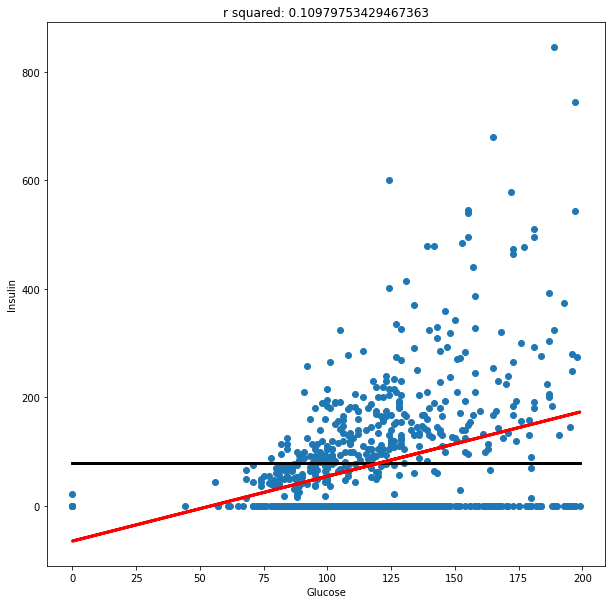

In [150]:
get_r_squared(df=df, 
              x_feature_name='Glucose',
              y_feature_name='Insulin',
              plot=True)